1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

npr.seed(203)


Decay probability:  0.003785207408038146


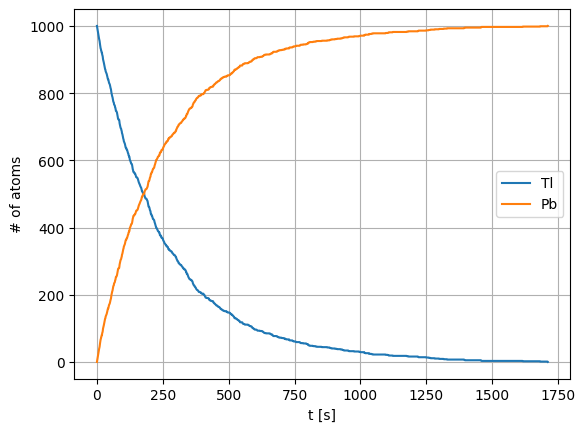

In [3]:
#timestep
dt = 1
#tau definition from the half-life time: T_1/2 = tau
tau = 3.052*60
#each particle as a probability of decay_prob = ln(2)/tau * dt to decay inside dt
decay_prob = np.log(2)/tau *dt
print("Decay probability: ", decay_prob)
#initial conditions
N_Tl = [1000]
N_Pb = [0]
t = [0]

while(N_Tl[-1]>0):
    #each atom as a probabily decay_prob to decay in this iteration.
    toss = npr.rand(int(N_Tl[-1]))
    decayed = len(toss[toss<decay_prob])
    N_Tl.append(N_Tl[-1]-decayed)
    N_Pb.append(N_Pb[-1]+decayed)
    t.append(t[-1]+dt)

plt.plot(t, N_Tl, label="Tl")
plt.plot(t, N_Pb, label="Pb")
plt.xlabel("t [s]")
plt.ylabel("# of atoms")
plt.grid()
plt.legend()
    

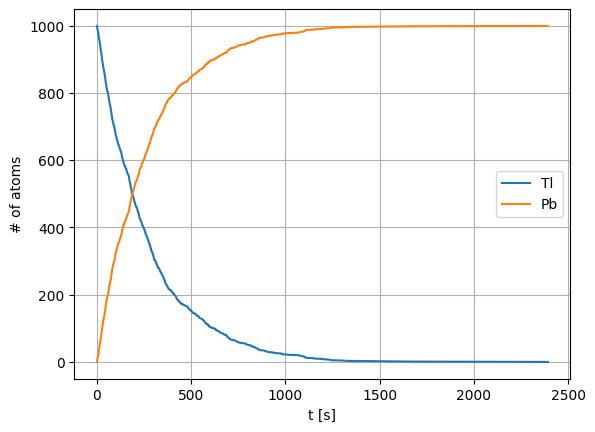

In [4]:
#now let's use the inverse transform method
#inverse of the cumulative probability
N0 = 1000
def P_inverse(r):
    global tau
    return -np.log2(1-r)*tau
vec_P_inverse = np.vectorize(P_inverse)
#let's generate 1000 random numbers according to that distribution
decay_time = vec_P_inverse(npr.rand(N0))

decay_time = np.sort(decay_time)

N_Tl = np.flip(range(N0))
N_Pb = range(N0)

plt.plot(decay_time, N_Tl, label="Tl")
plt.plot(decay_time, N_Pb, label="Pb")
plt.xlabel("t [s]")
plt.ylabel("# of atoms")
plt.grid()
plt.legend()
    

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

Let's recall that 
$$
a_0 = \frac{4 \pi \epsilon_0 \hbar^2}{m_e e^2} = \frac{\hbar}{\alpha  m_e} , \alpha = \frac{e^2}{4 \pi \epsilon_0 \hbar c} 
$$
So we got (setting the planck constant to 1 beacause it can be simpliefied preforming the fraction):
$$
\tan({\frac{\theta}{2}}) = \frac{2 Z \alpha}{E b} 
$$
with b that can be found exploinga a 2d gaussian distribution centered in 0 with standard deviation $\sigma = \frac{1}{100 \alpha m_e} \rightarrow  \sigma_b = \sqrt{2} * \sigma$

In [5]:
#parameters definition
Z = 79
alpha = 1/137
me = 0.510  #MeV
E = 7.7     #MeV
sigma = 1/alpha/100/me
N = 10000 #number of generated particles

#generation of the beam
x = npr.normal(loc = 0, scale=sigma, size=N)
y = npr.normal(loc = 0, scale=sigma, size=N)
b = np.sqrt(x**2+y**2)

#now I've just to calculate the fraction of particles with tan(theta/2)>1 -> b<2*Z*alpha/E
threshold =  2*Z*alpha/E

fraction = len(b[b<threshold])/len(b)*100
print(f"The threshold is: {threshold:3f}")
print(f"The std is: {sigma:3f}")
print(f"The fraction is {fraction:.3f}%")


The threshold is: 0.149777
The std is: 2.686275
The fraction is 0.150%


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [6]:
#let's compute it with the hit/miss
x_lim = (0, 2)
y_lim = (0, 1)

dx = x_lim[1]-x_lim[0]
dy = y_lim[1]-y_lim[0]
Area = dx*dy

N=10000
f = lambda x: np.sin(1/(x*(x-2)))**2

x_r = npr.rand(N)*dx
y_r = npr.rand(N)*dy
y = f(x_r)

fraction = len(y_r[y_r < y])/N
I_hitmiss = fraction*Area

print(f"Hit or miss integral: {I_hitmiss:.3f}")

Hit or miss integral: 1.461


In [7]:
#Now let's try with the mean method
I = dx/N*np.sum(y)
print(f"Mean method: {I:.3f}")

Mean method: 1.451


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [10]:
#Area of a unit circle in the x-y plane
f = np.vectorize(lambda x,y: 1 if(x**2+y**2<=1) else 0)

x_lim=[-1, 1]
y_lim=[-1, 1]
dx = x_lim[1]-x_lim[0]
dy = y_lim[1]-y_lim[0]
area_box = dx*dy 

N = 10000

x_r = npr.rand(N)*dx + x_lim[0]
y_r = npr.rand(N)*dy + y_lim[0]

area_2D = area_box/N*np.sum(f(x_r, y_r))
print(f"2d circle area: {area_2D:.3f}")
print(f"True area: {np.pi:.3f}")

#let's generalize to a 10D sphere
f = lambda x: 1 if(np.dot(x,x)<=1) else 0
N = 1000000
vol_box = dx**10
x_r = npr.rand(N, 10)*dx+x_lim[0]

vol_10D = vol_box/N*np.sum([f(x) for x in x_r])

print(f"10D volume: {vol_10D:.3f}")
print("True value: 2.550")


2d circle area: 3.140
True area: 3.142


10D volume: 2.500
True value: 2.550


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

$p(x) = 0.5*\sqrt(x)^{-1}$ so $P(x) = \sqrt(x)$ and x = P^2

In [17]:
weight_integral = 2

N = 10000
integrand = np.vectorize(lambda x: 1/(np.exp(x)+1))
inverse_weight_cumulative = np.vectorize(lambda x: x**2)

x = inverse_weight_cumulative(npr.rand(N))

I = np.sum(integrand(x))*weight_integral/N


print(f"Integral: {I:.2f}")

Integral: 0.84
